#  Unsupervised learning

See https://rstudio-pubs-static.s3.amazonaws.com/912277_78aee3e219ca4766857f24a4d4ecfc60.html

In [4]:
import io
import requests
import pandas as pd

In [5]:
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale customers data.csv')
r = r.content
r = pd.read_csv(io.StringIO(r.decode('utf-8')))
df = pd.DataFrame(r)

In [6]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df=df.drop(['Channel'], axis=1)
df=df.drop(['Region'], axis=1)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [11]:
indices = [0,154,398,273]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns=df.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,622,55,137,75,7,8
2,11442,1032,582,5390,74,247
3,36817,3045,1493,4802,210,1824


In [12]:
#df=df.drop(['Channel'], axis=1)

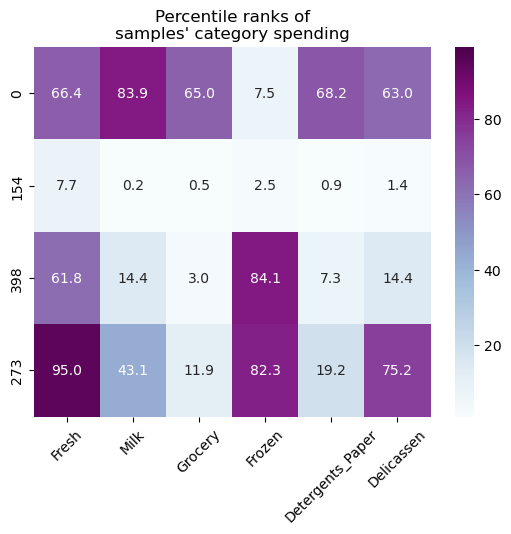

In [13]:
pcts = 100. * df.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
# Visualize %ile with heatmap

sns.heatmap(pcts, annot=True, vmin=1, vmax=99, fmt='.1f', cmap='BuPu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

In [14]:
# One of the things which we want to understand is how relationship between
# different items are related. Can we say for example that those who buy
# fresh often also buy frozen or similar pairs?

# Import libraries for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Remove column Fresh
new_data = df.drop('Grocery',axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(new_data, df['Grocery'], test_size=0.25, random_state=1)

# Create a decision tree regressor and fit it to the training set
regressor =  DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.7957683115761958


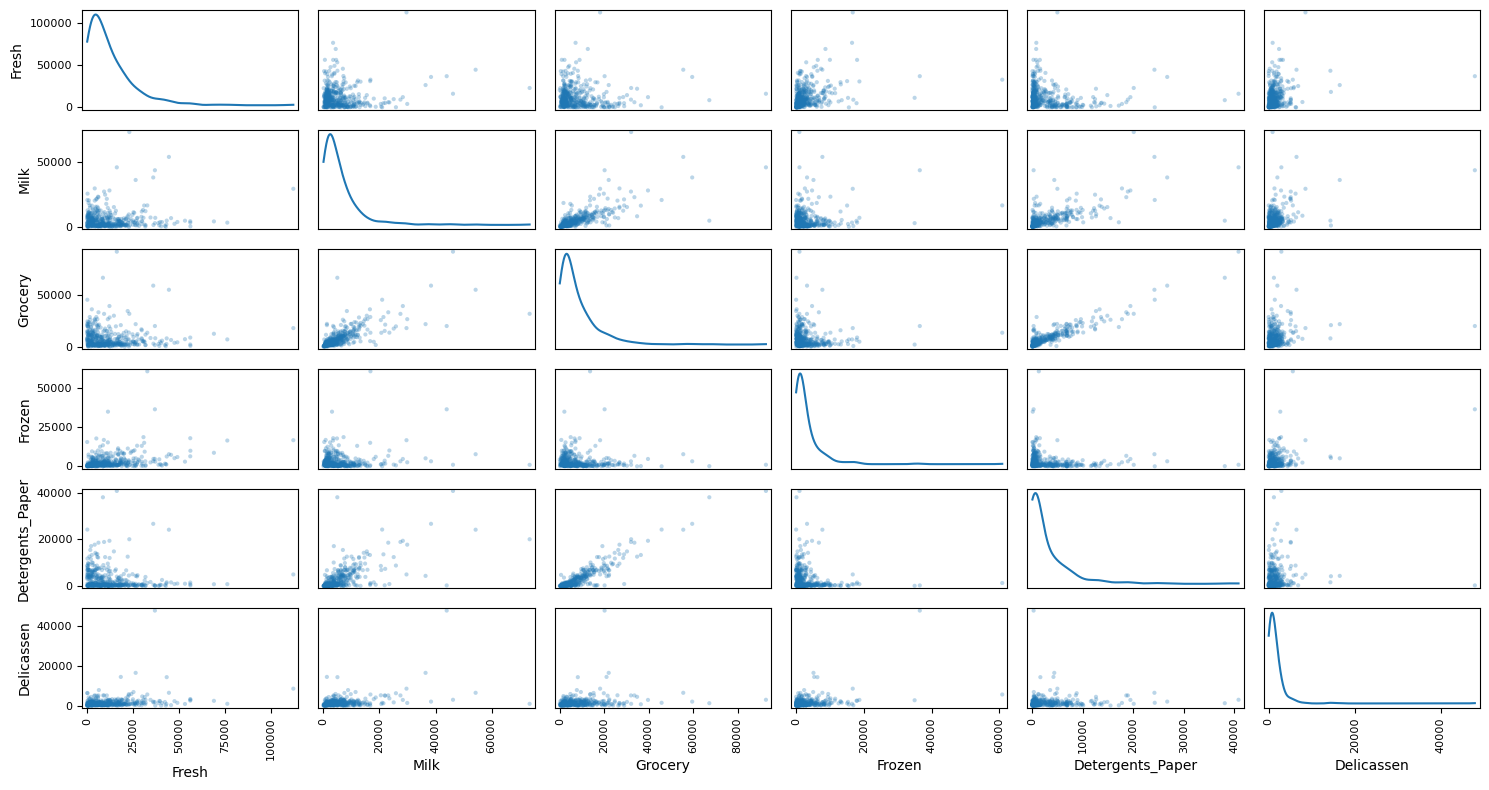

In [16]:
# R^2 of 0.8 shows that we can predict 'Grocery' fairly accurately
# using the other features in the dataset

pd.plotting.scatter_matrix(df, alpha=0.3,figsize=(15,8),diagonal='kde')
plt.tight_layout() # To avoid overlapping of plots

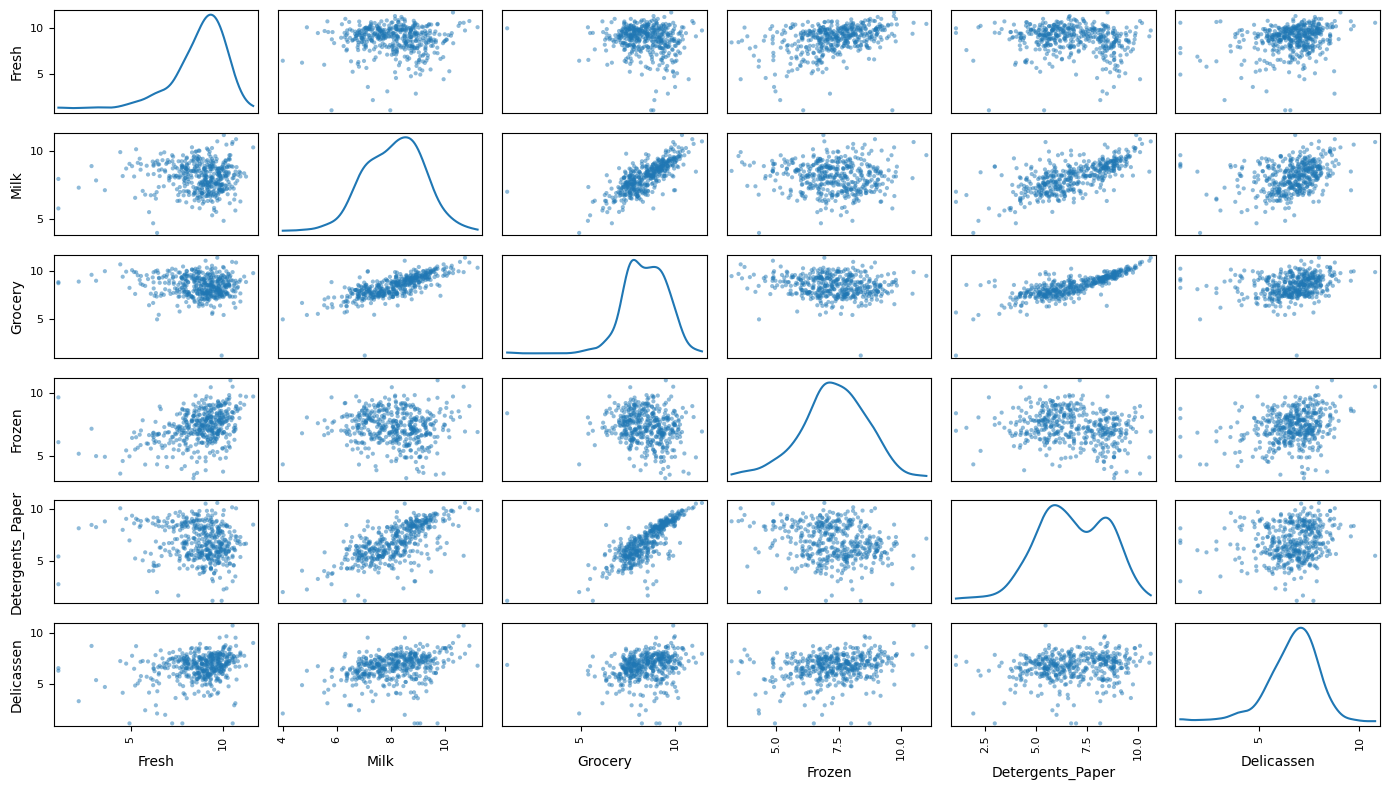

In [17]:
log_data = np.log(df.copy())
# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha=0.5, figsize=(14,8),diagonal='kde')
plt.tight_layout()

In [18]:
# We need to process data and account for outliers. We can use Tukey's Method for identfying outliers: 
# An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a 
# feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [19]:
for feature in log_data.keys():

    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, 25)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
177,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
237,9.835851,8.252707,6.385194,8.441176,3.332205,7.102499
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


In [20]:
# An outlier in several items is probably an outlier

# outliers  = [66, 75, 338, 142, 154, 289]
 
# Remove the outliers, if any were specified
#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

# We will return to remove this later based on results we obtain 

good_data = log_data

# Principal Component Analysis (PCA) 

In [21]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

In [22]:
print(pca.explained_variance_)

[4.83781898 3.02459061 1.27047648 1.05179707 0.50039796 0.25095302]


In [23]:
print(pca.explained_variance_ratio_)

[0.44237417 0.27657107 0.11617342 0.09617719 0.0457568  0.02294735]


Text(0, 0.5, 'Cumulative Variance')

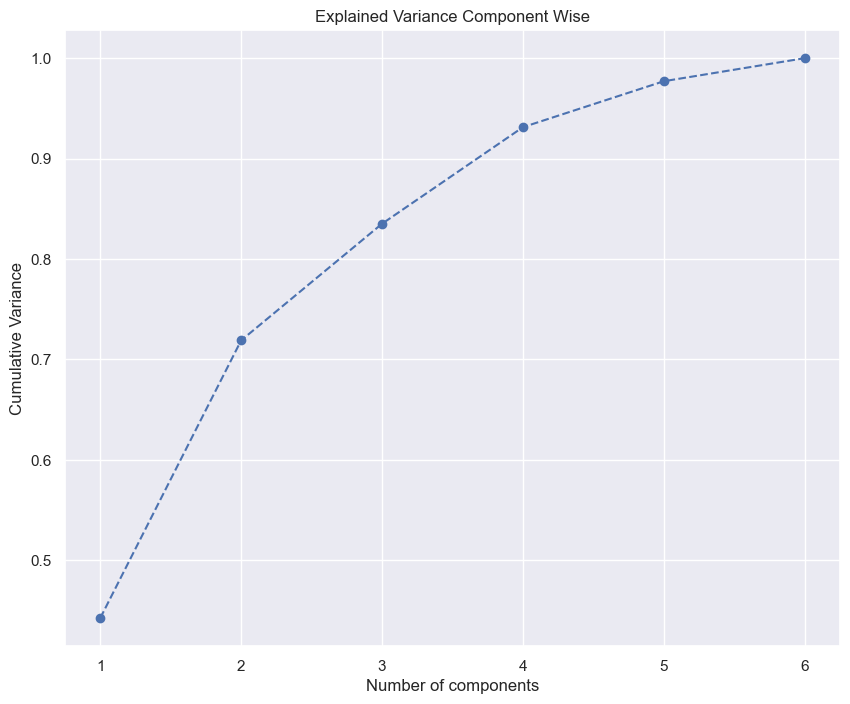

In [24]:
import seaborn as sns
sns.set()
plt.figure(figsize = (10,8))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = "--")
plt.title("Explained Variance Component Wise")
plt.xlabel("Number of components")
plt.ylabel("Cumulative Variance")

# One rule of thumb is to preserve 80% of the variance, so we choose ncomp=3

In [25]:
# Do PCA with fixed number of components

pca = PCA(n_components=3)
pca.fit(good_data)

PCA(n_components=3)

In [26]:
PCA(copy='True', iterated_power = 'auto', n_components=3, random_state='None', svd_solver='Auto', tol=0.0)

PCA(copy='True', n_components=3, random_state='None', svd_solver='Auto')

In [27]:
pca.transform(good_data)
score_pca = pca.transform(good_data)

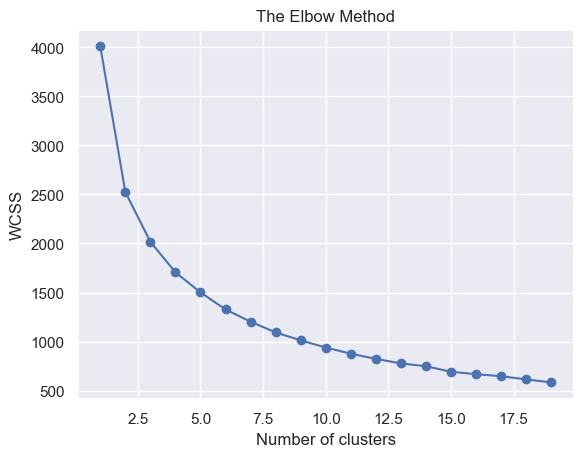

In [28]:
# We’ll incorporate these new obtained PCA scores in the K-means cluster algorithm. 
# That's how we can perform segmentation based on principal components scores instead of the original features.

# Using the Elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
WCSS = []
# Within-Cluster Sum of Squares
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(score_pca)
    WCSS.append(kmeans.inertia_)
    # kmeans.inertia_ := Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided
plt.plot(range(1, 20), WCSS, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [30]:
kmeans.fit(score_pca)

KMeans(n_clusters=4, random_state=42)

In [31]:
KMeans(algorithm='auto',copy_x='True',init ='k-means++',max_iter = 300, n_clusters=4, n_init=10, random_state = 42, tol=0.001)

KMeans(algorithm='auto', copy_x='True', n_clusters=4, random_state=42,
       tol=0.001)

# K-Means clustering with PCA results

In [32]:
good_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [33]:
df_segm_pca_kmeans = pd.concat([good_data.reset_index(drop='True'),pd.DataFrame(score_pca)], axis=1)

In [34]:
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3'] 
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans.labels_

In [37]:
df_segm_pca_kmeans.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Component 1,Component 2,Component 3,Segment K-means PCA
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,-1.750985,-0.070515,-0.911759,1
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,-1.800365,-0.869754,0.212831,1
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,-1.893736,-1.676621,1.318885,1
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,1.127313,-1.457982,0.524745,0
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,-0.796711,-2.460866,0.470580,0


In [51]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third', 3:'fourth'})

/Users/apple/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


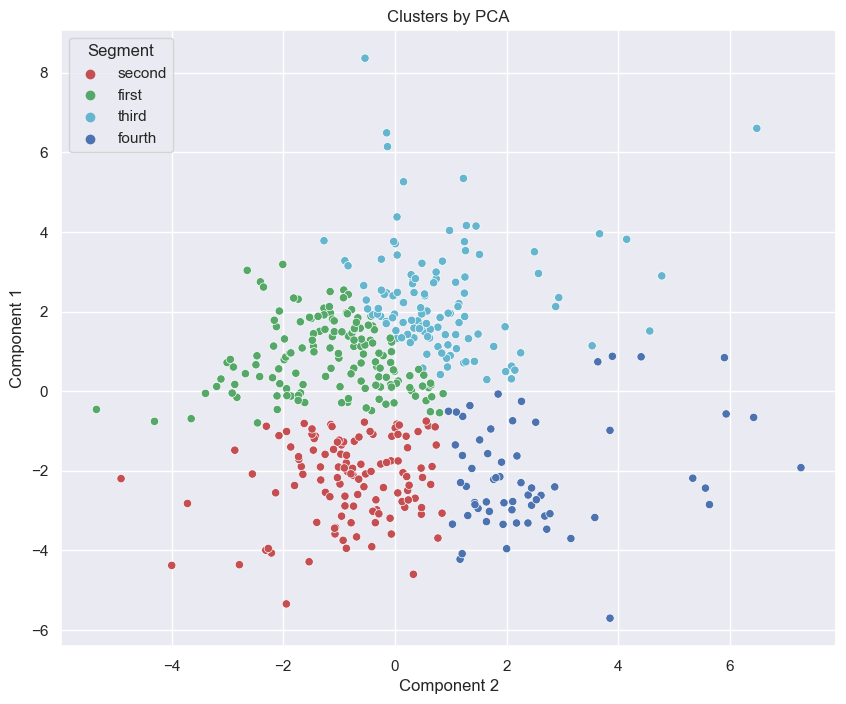

In [52]:
x = df_segm_pca_kmeans['Component 2']
y = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x, y, hue = df_segm_pca_kmeans['Segment'], palette=['r', 'g', 'c', 'b']) 
plt.title('Clusters by PCA')
plt.show()

/Users/apple/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


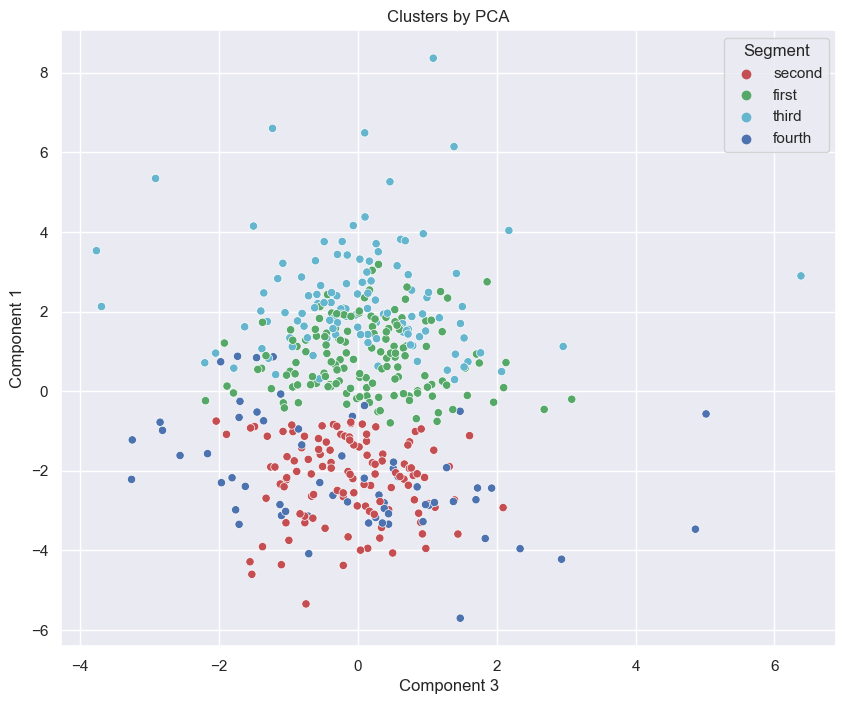

In [53]:
x = df_segm_pca_kmeans['Component 3']
y = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x, y, hue = df_segm_pca_kmeans['Segment'], palette=['r', 'g', 'c', 'b']) 
plt.title('Clusters by PCA')
plt.show()